In [1]:
import os, pandas, matplotlib_venn

In [2]:
import matplotlib

# user-defined variables

In [3]:
# necio5
results_dir = '/Users/adrian/gd15/tmp/DEGs/'

In [4]:
# drangajokull
results_dir = '/home/adrian/projects/vigur/results/sequencing/DEGs/'
rss_hlmv_results_dir = '/home/adrian/projects/vigur/results/transcriptomics/deseq2_filtered/'

In [5]:
experiments = ['1', '2', '3']
trends = ['up', 'down']

# read result files

In [6]:
found = os.listdir(results_dir)
print(len(found))
result_files = [element for element in found if 'run' in element]
result_files.sort()

print('we should have 42 times two equals 84 files')
print('we have')
print(len(result_files))

86
we should have 42 times two equals 84 files
we have
84


# read previous results, RSS DEGs from transcriptomics

In [7]:
df = pandas.read_csv(
    rss_hlmv_results_dir+'experiment_three_concentration_five_time_four_up_filtered.tsv', 
    sep='\t', 
    skiprows=1)
rss_up_genes = df['ENSEMBL'].to_list()
print(len(rss_up_genes))

71


In [8]:
df = pandas.read_csv(
    rss_hlmv_results_dir+'experiment_three_concentration_five_time_four_down_filtered.tsv', 
    sep='\t', 
    skiprows=1)
rss_down_genes = df['ENSEMBL'].to_list()
print(len(rss_down_genes))

27


# working on run 72

In [9]:
run = '72'
timepoints = ['four']
treatments = ['mix']

mix four
	 experiment 1
			 run_72_treatment_mix_time_four_exp_1_up.tsv
			 run_72_treatment_mix_time_four_exp_1_down.tsv
			 86 17
	 experiment 2
			 run_72_treatment_mix_time_four_exp_2_up.tsv
			 run_72_treatment_mix_time_four_exp_2_down.tsv
			 69 10
	 experiment 3
			 run_72_treatment_mix_time_four_exp_3_up.tsv
			 run_72_treatment_mix_time_four_exp_3_down.tsv
			 107 15
robust_up 72
42 34
6


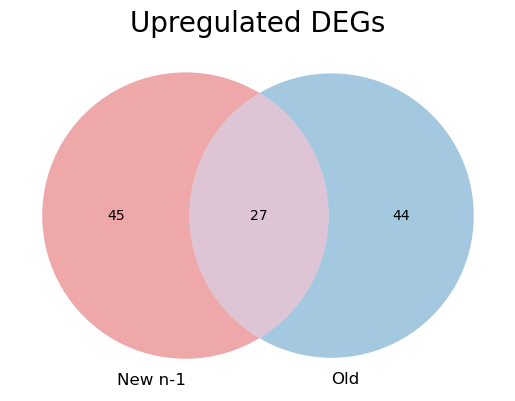

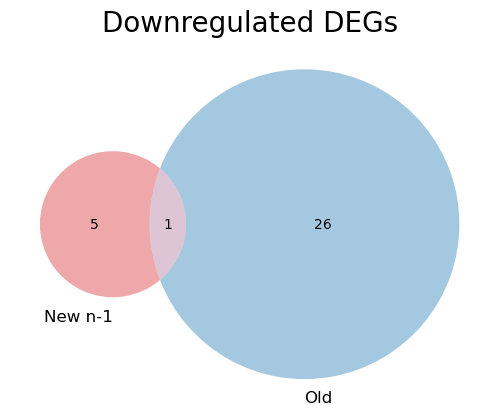

In [12]:
for timepoint in timepoints:
    for treatment in treatments:
        print(treatment, timepoint)
        
        # iterating over experiments
        ups = []; downs = []
        for experiment in experiments:
            print('\t experiment', experiment)
            
            DEG_files = [sub for sub in result_files if (run+'_treatment_'+treatment in sub) & ('_'+timepoint+'_' in sub) & ('exp_'+experiment in sub)]
            DEG_files.sort()
            
            if len(DEG_files) != 2:
                raise ValueError('found more files than expected')
        
            up_file = DEG_files[1]
            path = results_dir + up_file
            df = pandas.read_csv(path, sep='\t', index_col=0)
            ensembl_IDs_up = df.index.to_list()

            down_file = DEG_files[0]
            path = results_dir + down_file
            df = pandas.read_csv(path, sep='\t', index_col=0)
            ensembl_IDs_down = df.index.to_list()

            print('\t\t\t', up_file)
            print('\t\t\t', down_file)
            print('\t\t\t', len(ensembl_IDs_up), len(ensembl_IDs_down))

            ups.append(set(ensembl_IDs_up)); downs.append(set(ensembl_IDs_down))
            
        # find the intersect
        all_ups = []
        for element in ups[0]:
            all_ups.append(element)
        for element in ups[1]:
            all_ups.append(element)
        for element in ups[2]:
            all_ups.append(element)
        all_ups_unique = list(set(all_ups))
        robust_up = [element for element in all_ups_unique if all_ups.count(element) >= 2]
        
        print('robust_up',len(robust_up))

        all_downs = []
        for element in downs[0]:
            all_downs.append(element)
        for element in downs[1]:
            all_downs.append(element)
        for element in downs[2]:
            all_downs.append(element)
        all_downs_unique = list(set(all_downs))
        print(len(all_downs), len(all_downs_unique))
        robust_down = [element for element in all_downs_unique if all_downs.count(element) >= 2]
        print(len(robust_down))

        matplotlib_venn.venn2([set(robust_up), set(rss_up_genes)], set_labels=['New n-1', 'Old'], set_colors = ['tab:red', 'tab:blue'])
        matplotlib.pyplot.title('Upregulated DEGs', fontsize=20)
        matplotlib.pyplot.show()

        matplotlib_venn.venn2([set(robust_down), set(rss_down_genes)], set_labels=['New n-1', 'Old'], set_colors = ['tab:red', 'tab:blue'])
        matplotlib.pyplot.title('Downregulated DEGs', fontsize=20)
        matplotlib.pyplot.show()
        
        # some prints
        intersect = set(robust_up) & set(rss_up_genes)

In [15]:
import mygene

In [16]:
mg = mygene.MyGeneInfo()

In [18]:
test = mg.getgene('ENSG00000198400')


In [19]:
for key in test:
    print(key, test[key])

AllianceGenome 8031
HGNC 8031
MIM 191315
_id 4914
_version 7
accession {'genomic': ['AB019488.2', 'AL158169.17', 'AY321513.1', 'CH471121.2', 'CP068277.2', 'HG532018.1', 'MW467564.1', 'NC_000001.11', 'NC_060925.1', 'NG_007493.1', 'X71445.1', 'Y09028.1', 'Y09029.1', 'Y09030.1', 'Y09031.1', 'Y09032.1', 'Y09033.1', 'Y09034.1', 'Y09035.1', 'Y09036.1'], 'protein': ['AAA36770.1', 'AAH62580.1', 'AAI36555.1', 'AAI44240.1', 'AAP88292.1', 'AHW56542.1', 'AHW56543.1', 'BAA34355.1', 'BAF83448.1', 'BAG35582.1', 'CDI70969.1', 'EAW52900.1', 'EAW52901.1', 'EAW52902.1', 'NP_001007793.1', 'NP_001012331.1', 'NP_002520.2', 'P04629.4'], 'rna': ['AK126428.1', 'AK290759.1', 'AK312704.1', 'BC062580.1', 'BC136554.1', 'BC144239.1', 'BM685020.1', 'CR936794.1', 'KJ534902.1', 'KJ534903.1', 'M23102.1', 'NM_001007792.1', 'NM_001012331.2', 'NM_002529.4'], 'translation': [{'protein': 'AHW56542.1', 'rna': 'KJ534902.1'}, {'protein': 'NP_002520.2', 'rna': 'NM_002529.4'}, {'protein': 'AAH62580.1', 'rna': 'BC062580.1'}, {'pr

In [30]:
for element in intersect:
    info = mg.getgene(element)
    
    gene_name = info['name']
    symbol = info['symbol']
    print('{}\t\t{}'.format(symbol, gene_name))

NTRK1		neurotrophic receptor tyrosine kinase 1
SH2D2A		SH2 domain containing 2A
GNAL		G protein subunit alpha L
SORBS1		sorbin and SH3 domain containing 1
LRRC1		leucine rich repeat containing 1
TNFSF15		TNF superfamily member 15
CXCR4		C-X-C motif chemokine receptor 4
PDK4		pyruvate dehydrogenase kinase 4
DUSP4		dual specificity phosphatase 4
NPTX1		neuronal pentraxin 1
CREM		cAMP responsive element modulator
DIO2		iodothyronine deiodinase 2
C11orf96		chromosome 11 open reading frame 96
THBD		thrombomodulin
IL11		interleukin 11
STC1		stanniocalcin 1
CHMP1B		charged multivesicular body protein 1B
NR4A3		nuclear receptor subfamily 4 group A member 3
CHRNA9		cholinergic receptor nicotinic alpha 9 subunit
SLC7A2		solute carrier family 7 member 2
GRAMD1B		GRAM domain containing 1B
NR4A2		nuclear receptor subfamily 4 group A member 2
HR		HR lysine demethylase and nuclear receptor corepressor
AREG		amphiregulin
RASD1		ras related dexamethasone induced 1
RNF152		ring finger protein 152
PDE3A	

In [23]:
info['name']

'neurotrophic receptor tyrosine kinase 1'